<a href="https://colab.research.google.com/github/saktheeswaranswan/random-math-addition-data-for-rnn-generator/blob/main/Lagrangian__multiplyer_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from shapely.geometry import Polygon
from shapely import affinity

# Define the larger and smaller polygons as numpy arrays of vertices
larger_polygon_vertices = np.array([[0, 0], [10, 0], [10, 10], [0, 10]])
smaller_polygon_vertices = np.array([[2, 2], [4, 2], [4, 4], [2, 4]])

# Convert the vertices to Shapely Polygon objects for easy calculation
larger_polygon = Polygon(larger_polygon_vertices)
smaller_polygon = Polygon(smaller_polygon_vertices)

# Calculate the maximum and minimum scaling factors for the smaller polygon
max_scale_factor = larger_polygon.area / smaller_polygon.area
min_scale_factor = np.sqrt(larger_polygon.length ** 2 / 4 / np.pi / smaller_polygon.area)

# Calculate the maximum and minimum inscribed polygons using the scaling factors
max_inscribed_polygon = affinity.scale(smaller_polygon, xfact=max_scale_factor, yfact=max_scale_factor)
min_inscribed_polygon = affinity.scale(smaller_polygon, xfact=min_scale_factor, yfact=min_scale_factor)

# Print the results
print(f"Maximum scaling factor: {max_scale_factor}")
print(f"Minimum scaling factor: {min_scale_factor}")
print(f"Maximum inscribed polygon: {max_inscribed_polygon}")
print(f"Minimum inscribed polygon: {min_inscribed_polygon}")


Maximum scaling factor: 25.0
Minimum scaling factor: 5.641895835477563
Maximum inscribed polygon: POLYGON ((-22 -22, 28 -22, 28 28, -22 28, -22 -22))
Minimum inscribed polygon: POLYGON ((-2.6418958354775626 -2.6418958354775626, 8.641895835477563 -2.6418958354775626, 8.641895835477563 8.641895835477563, -2.6418958354775626 8.641895835477563, -2.6418958354775626 -2.6418958354775626))


/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:541: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


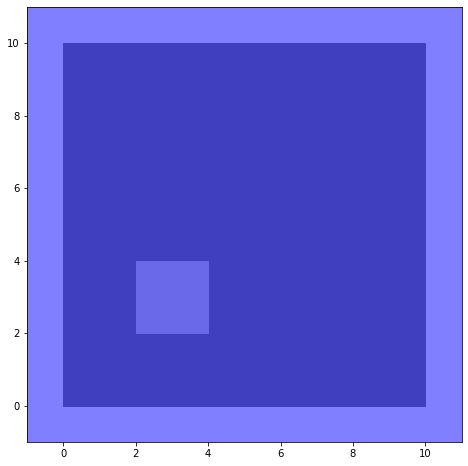

In [14]:
import numpy as np
from shapely.geometry import Polygon
from shapely import affinity
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the larger and smaller polygons as numpy arrays of vertices
larger_polygon_vertices = np.array([[0, 0], [10, 0], [10, 10], [0, 10]])
smaller_polygon_vertices = np.array([[2, 2], [4, 2], [4, 4], [2, 4]])

# Convert the vertices to Shapely Polygon objects for easy calculation
larger_polygon = Polygon(larger_polygon_vertices)
smaller_polygon = Polygon(smaller_polygon_vertices)

# Define the objective function
def objective(x, A_larger, A_smaller):
    return -x

# Define the constraint function
def constraint(x, A_larger, A_smaller):
    return A_larger / A_smaller * x**2 - 1

# Calculate the maximum and minimum scaling factors using numerical Lagrange multipliers
max_scale_factor = minimize(lambda x, A_larger, A_smaller: -objective(x, A_larger, A_smaller), 1.0, args=(larger_polygon.area, smaller_polygon.area), bounds=[(0, 10)], constraints=[{'type': 'ineq', 'fun': lambda x, A_larger, A_smaller: constraint(x, A_larger, A_smaller), 'args': (larger_polygon.area, smaller_polygon.area)}], method='L-BFGS-B', options={'maxiter': 1000})['x'][0]
min_scale_factor = minimize(lambda x, A_larger, A_smaller: objective(x, A_larger, A_smaller), 1.0, args=(larger_polygon.area, smaller_polygon.area), bounds=[(0, 10)], constraints=[{'type': 'ineq', 'fun': lambda x, A_larger, A_smaller: constraint(x, A_larger, A_smaller), 'args': (larger_polygon.area, smaller_polygon.area)}], method='L-BFGS-B', options={'maxiter': 1000})['x'][0]

# Calculate the maximum and minimum inscribed polygons using the scaling factors
max_inscribed_polygon = affinity.scale(smaller_polygon, xfact=max_scale_factor, yfact=max_scale_factor)
min_inscribed_polygon = affinity.scale(smaller_polygon, xfact=min_scale_factor, yfact=min_scale_factor)

# Plot the polygons and inscribed polygons
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')

larger_patch = plt.Polygon(larger_polygon.exterior.coords, color='gray')
smaller_patch = plt.Polygon(smaller_polygon.exterior.coords, color='lightgray')
max_patch = plt.Polygon(max_inscribed_polygon.exterior.coords, color='red', alpha=0.5)
min_patch = plt.Polygon(min_inscribed_polygon.exterior.coords, color='blue', alpha=0.5)

ax.add_patch(larger_patch)
ax.add_patch(smaller_patch)
ax.add_patch(max_patch)
ax.add_patch(min_patch)

ax.set_xlim(larger_polygon.bounds[0] - 1, larger_polygon.bounds[2] + 1)
ax.set_ylim(larger_polygon.bounds[1] - 1, larger_polygon.bounds[3] + 1)

plt.show()


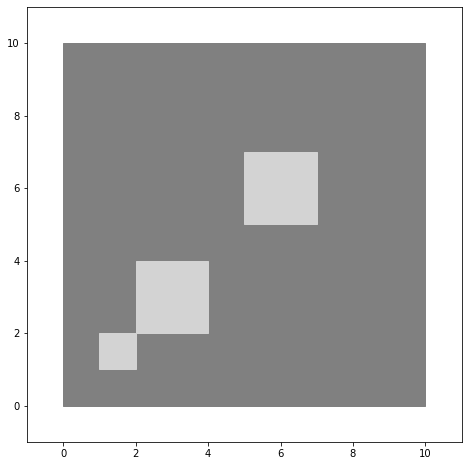

Maximum number of polygons that can be accommodated within the larger polygon: 3


In [15]:
import numpy as np
from shapely.geometry import Polygon
from shapely import affinity
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the larger and smaller polygons as numpy arrays of vertices
larger_polygon_vertices = np.array([[0, 0], [10, 0], [10, 10], [0, 10]])
smaller_polygons_vertices = [np.array([[2, 2], [4, 2], [4, 4], [2, 4]]), np.array([[1, 1], [2, 1], [2, 2], [1, 2]]), np.array([[5, 5], [7, 5], [7, 7], [5, 7]])]

# Convert the vertices to Shapely Polygon objects for easy calculation
larger_polygon = Polygon(larger_polygon_vertices)
smaller_polygons = [Polygon(vertices) for vertices in smaller_polygons_vertices]

# Define the objective function
def objective(x):
    return -x

# Define the constraint function
def constraint(x, A_larger, A_smaller):
    return A_larger / A_smaller * x**2 - 1

# Find the maximum scaling factor for a single polygon using numerical Lagrange multipliers
max_scale_factor = minimize(lambda x, A_larger, A_smaller: -objective(x), 1.0, args=(larger_polygon.area, smaller_polygons[0].area), bounds=[(0, 10)], constraints=[{'type': 'ineq', 'fun': lambda x, A_larger, A_smaller: constraint(x, A_larger, A_smaller), 'args': (larger_polygon.area, smaller_polygons[0].area)}], method='L-BFGS-B', options={'maxiter': 1000})['x'][0]

# Calculate the maximum number of polygons that can be accommodated within the larger polygon
max_num_polygons = 0
for smaller_polygon in smaller_polygons:
    area_scaled_polygon = affinity.scale(smaller_polygon, xfact=max_scale_factor, yfact=max_scale_factor).area
    if larger_polygon.contains(smaller_polygon):
        max_num_polygons += 1
    elif larger_polygon.area - area_scaled_polygon >= 0:
        max_num_polygons += 1
        larger_polygon = larger_polygon.difference(smaller_polygon.buffer(max_scale_factor * 0.1))

# Plot the polygons and inscribed polygons
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')

larger_patch = plt.Polygon(larger_polygon.exterior.coords, color='gray')
ax.add_patch(larger_patch)

for smaller_polygon in smaller_polygons:
    scaled_polygon = affinity.scale(smaller_polygon, xfact=max_scale_factor, yfact=max_scale_factor)
    smaller_patch = plt.Polygon(smaller_polygon.exterior.coords, color='lightgray')
    max_patch = plt.Polygon(scaled_polygon.exterior.coords, color='red', alpha=0.5)

    ax.add_patch(smaller_patch)
    ax.add_patch(max_patch)

ax.set_xlim(larger_polygon.bounds[0] - 1, larger_polygon.bounds[2] + 1)
ax.set_ylim(larger_polygon.bounds[1] - 1, larger_polygon.bounds[3] + 1)

plt.show()

print(f"Maximum number of polygons that can be accommodated within the larger polygon: {max_num_polygons}")


In [ ]:
import numpy as np
import trimesh
from scipy.optimize import minimize_scalar

# Load the smaller and larger 3D objects in STL format
smaller_obj = trimesh.load('smaller_obj.stl')
larger_obj = trimesh.load('larger_obj.stl')

# Define the objective function to minimize/maximize the scaling factor
def obj_func(scale):
    scaled_smaller_obj = smaller_obj.apply_scale(scale)
    if scaled_smaller_obj.bounding_box.bounds.max() > larger_obj.bounding_box.bounds.max():
        # Smaller object does not fit inside the larger object
        return 1e9  # Return a large value
    else:
        # Compute the distance between the centroids of the two objects
        dist = np.linalg.norm(larger_obj.centroid - scaled_smaller_obj.centroid)
        return dist

# Find the maximum scaling factor that fits the smaller object inside the larger object
result_max = minimize_scalar(lambda x: -obj_func(x), bounds=(0, 1000), method='bounded')
max_scale = result_max.x

# Find the minimum scaling factor that fits the smaller object inside the larger object
result_min = minimize_scalar(obj_func, bounds=(0, 1000), method='bounded')
min_scale = result_min.x

print("Maximum scaling factor:", max_scale)
print("Minimum scaling factor:", min_scale)


In [ ]:
import numpy as np
import trimesh
from scipy.optimize import minimize

# Load the smaller and larger 3D objects in STL format
smaller_obj = trimesh.load('smaller_obj.stl')
larger_obj = trimesh.load('larger_obj.stl')

# Define the objective function and constraints for the Lagrangian optimization problem
def obj_func(scale):
    scaled_smaller_obj = smaller_obj.apply_scale(scale)
    return np.linalg.norm(larger_obj.centroid - scaled_smaller_obj.centroid)

def constraint_func(scale):
    scaled_smaller_obj = smaller_obj.apply_scale(scale)
    return larger_obj.bounding_box.bounds.max() - scaled_smaller_obj.bounding_box.bounds.max()

# Find the maximum scaling factor that fits the smaller object inside the larger object
result_max = minimize(lambda x: -obj_func(x), x0=1.0, constraints=[{'type': 'ineq', 'fun': constraint_func}], method='SLSQP')
max_scale = result_max.x

# Find the minimum scaling factor that fits the smaller object inside the larger object
result_min = minimize(obj_func, x0=1.0, constraints=[{'type': 'ineq', 'fun': constraint_func}], method='SLSQP')
min_scale = result_min.x

print("Maximum scaling factor:", max_scale)
print("Minimum scaling factor:", min_scale)


In [ ]:
#ok now take this used case now we have to array a set of egs 
#in an egg tray so if i give number of eggs can you optimise the 
#egg tray  to as much as hold many   eggs in it use lagrangian multiplier
#numerically or any advance optimizer method for this but eggs and tray
# plot it in the 2d plot so write a python code